### 手書き数字認識　
#### 　　kerasのgeneratorを使用し　データ拡張しながら　CNN　(ニュ－ラルネットワーク）    
    
    kerasのgenerator
    自作のloss関数
    学習途中の表示
    不正解画像の表示
    
    

In [1]:
#　手書き数字認識　ディープラーニング

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras.utils import plot_model
from keras.models import model_from_json,load_model
from keras.models import Sequential, load_model

import time
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from keras.optimizers import Adam
from keras import backend as K
from keras import losses
from keras.metrics import categorical_accuracy,top_k_categorical_accuracy,categorical_crossentropy
import tensorflow as tf



In [3]:
import tensorflow as tf

In [4]:
import sys
print('Python.version',sys.version)
print('tensorflow.version',tf.__version__)
print('keras.version',keras.__version__)

Python.version 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
tensorflow.version 1.15.0
keras.version 2.2.4


#### 用意したファイルを読み込む

In [5]:
# フラットに展開したデータを読み込む

y_train=np.load('DATA/y_train.npy')
y_test=np.load('DATA/y_test.npy')

Xtrain=np.load('DATA/Xtrain.npy')
ytrain=np.load('DATA/ytrain.npy')
Xtest=np.load('DATA/Xtest.npy')
ytest=np.load('DATA/ytest.npy')

print('y_train.shape :',y_train.shape)
print('y_test.shape  :',y_test.shape)
print(' ')
print('Xtrain.shape   :',Xtrain.shape)
print('ytrain.shape  :',ytrain.shape)
print('Xtest.shape   :',Xtest.shape)
print('ytest.shape  :',ytest.shape)

y_train.shape : (60000, 10)
y_test.shape  : (10000, 10)
 
Xtrain.shape   : (60000, 28, 28)
ytrain.shape  : (60000,)
Xtest.shape   : (10000, 28, 28)
ytest.shape  : (10000,)


In [6]:
#入力データを４次のテンソルに変換

X_train=Xtrain.reshape(60000,28,28,1)
X_test =Xtest.reshape(10000,28,28,1)
print('X_train.shape',X_train.shape)

X_train.shape (60000, 28, 28, 1)


#### generator　作成
    kerasのImageDataGenerator　を使用
    Xtrainに適用する　flow


#### CＮＮモデルの作成
    入力データは、
    第一段は、入力データを　300点のノードに　活性化関数は　 'relu' 
    第二段は　30点　dropoutを付与
    最終段は、出力0-9の値　'softmax'関数で出力
    
#### コンパイル
    モデルに、学習アルゴリズム、評価関数等を指定しコンパイルする。
    
#### 学習
    以下の値を入れ学習をスタートさせる
        学習データ、正解値データ　　
        エポック数（まとまった学習単位）の数　　エポックの切れ目で色々な事が出来る。
        バッチサイズ（１回の学習に使うサンプル数）
        バッチ数（１エポック中のバッチ数）
        
#### テスト
    学習させたモデルを使い　テストデータを入力し　性能を確認する
 

In [7]:
#　Generator　関数　の作成　

#　データ拡張を行い　過学習の影響を修正する
#　　　ImageDataGenerator　を使用して
#      入力データを４次元データに変換する必要あり

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')


In [8]:
#　CNNのモデル作成 1
i_shape=(28,28,1)

model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',
                        input_shape=i_shape))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.08))#Dropout
model.add(layers.Dense(10,activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 648)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               194700    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                9030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
______________________

In [7]:
#　CNNのモデル作成 2
'''
i_shape=(28,28,1)

model = models.Sequential()
model.add(layers.Flatten(input_shape=i_shape))

model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.05))#Dropout
model.add(layers.Dense(10,activation='softmax'))

model.summary()
'''

"\ni_shape=(28,28,1)\n\nmodel = models.Sequential()\nmodel.add(layers.Flatten(input_shape=i_shape))\n\nmodel.add(layers.Dense(200, activation='relu'))\nmodel.add(layers.Dense(60, activation='relu'))\nmodel.add(layers.Dropout(0.05))#Dropout\nmodel.add(layers.Dense(10,activation='softmax'))\n\nmodel.summary()\n"

In [9]:
#　損失関数
from keras.optimizers import Adam
from keras import backend as K
from keras import losses
from keras.metrics import categorical_accuracy,top_k_categorical_accuracy,categorical_crossentropy
import tensorflow as tf

#  mean_absolute_error(y_true, y_pred)
#  categorical_crossentropy(y_true, y_pred)
#  binary_crossentropy(y_true, y_pred)

def new_loss(y_true, y_pred): 
#     return 1e-1*categorical_crossentropy(y_true, y_pred) - top_5_accuracy(y_true, y_pred)
#    return categorical_crossentropy(y_true, y_pred) - top_5_accuracy(y_true, y_pred)
#    return  mean_absolute_error(y_true, y_pred)
    return 1e-1*categorical_crossentropy(y_true, y_pred) - f1(y_true, y_pred)


#　評価関数

#  binary_accuracy(y_true, y_pred)
#  categorical_accuracy(y_true, y_pred)
#  top_k_categorical_accuracy(y_true, y_pred, k=5)

def top_5_accuracy(y_true,y_pred):
        return top_k_categorical_accuracy(y_true,y_pred,k=5)
    
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

# 最適化
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

#  keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#  keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#  keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#  keras.optimizers.TFOptimizer(optimizer)



In [10]:
#　モデルのコンパイル

from keras import optimizers
model.compile(optimizer='rmsprop',
               #optimaizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
               #loss='categorical_crossentropy',
               loss=new_loss,
               metrics=['accuracy'] 
             )






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#　Generator　関数　の作成　

#　データ拡張を行い　過学習の影響を修正する
#　　　ImageDataGenerator　を使用して
#      入力データを４次元データに変換する必要あり

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# generatorにデータを入れる
b_size=128#　batchサイズ　パラメータ修正計算の単位
s_per_epoch=len(X_train)//b_size#エポック内のバッチの数

train_generator = datagen.flow(
            X_train, y_train, batch_size=b_size)

valid_generator = datagen.flow(
            X_test, y_test, batch_size=b_size)      

    

In [12]:
%%time
# 学習

#model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) / 32, epochs=20)

history = model.fit_generator(train_generator,
                              steps_per_epoch=s_per_epoch,
                              epochs=50,
                              validation_data=valid_generator,
                              validation_steps=10
                              )
    




Epoch 1/50





468/468 [==============================] - 38s 81ms/step - loss: 1.3752 - acc: 0.1137 - val_loss: 1.3262 - val_acc: 0.1328
Epoch 2/50
468/468 [==============================] - 39s 84ms/step - loss: 1.2017 - acc: 0.1767 - val_loss: 1.1081 - val_acc: 0.2109
Epoch 3/50
468/468 [==============================] - 38s 82ms/step - loss: 0.9692 - acc: 0.2548 - val_loss: 0.7592 - val_acc: 0.3156
Epoch 4/50
468/468 [==============================] - 42s 90ms/step - loss: 0.0113 - acc: 0.3108 - val_loss: -0.1677 - val_acc: 0.4086
Epoch 5/50
468/468 [==============================] - 43s 91ms/step - loss: -0.2035 - acc: 0.4638 - val_loss: -0.2961 - val_acc: 0.5344
Epoch 6/50
468/468 [==============================] - 43s 93ms/step - loss: -0.3180 - acc: 0.5514 - val_loss: -0.3832 - val_acc: 0.6125
Epoch 7/50
468/468 [==============================] - 43s 92ms/step - loss: -0.4224 - acc: 0.6242 - val_loss: -0.5303 - val_acc: 0.7109
Epoch 8/50
468/468 [===========================

468/468 [==============================] - 40s 85ms/step - loss: -0.8265 - acc: 0.8955 - val_loss: -0.8747 - val_acc: 0.9266
Epoch 50/50
468/468 [==============================] - 40s 85ms/step - loss: -0.8324 - acc: 0.8993 - val_loss: -0.8526 - val_acc: 0.9148
Wall time: 34min 19s


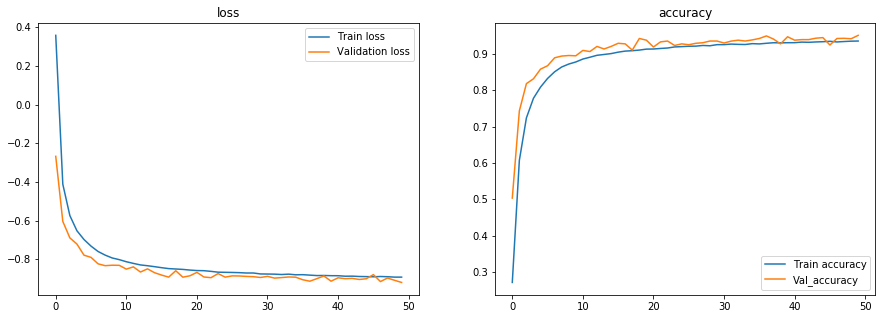

In [13]:
#　訓練時の損失率と正解率をプロット

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(history.epoch, history.history["acc"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_acc"], label="Val_accuracy")
ax[0].legend()
ax[1].legend()

In [13]:
# モデルの保存

model_name='model/MODEL_C03_NN_0529'

model.save(model_name + '.hdf5')

model.save_weights(model_name + '_weight.hdf5')
#save as JSON
json_string = model.to_json()
open(model_name + '.json','w').write(json_string)

2597

In [15]:
### 学習済みモデルの読み込み
model_name='model/MODEL_C03_NN_0529'

model2=model_from_json(open(model_name + '.json','r').read())
model2.load_weights(model_name  + '_weight.hdf5')


model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 648)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               194700    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                9030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total para

#### 不正解データの取り出し
    予測値　予測＋to_categoricaの逆　（onehot⇒0-9の値）
    正解値　
    不正解の　id、予測値　正解値　を　データフレームに
       ３つのデータをarrayに
       assin()メソッドで　データフレームに追加
    
    Xtrain,ytrain, wosiyou を使用
    

In [14]:
# 不正解データを取り出し　データフレームに

y_test_pred=model.predict(X_test)     #　モデルで予測
ytest_pred=np.argsort(-y_test_pred, axis = 1)[:,:1] #　onehotデータを数値順に並べ替え　そのidを返す
ytest_pred=ytest_pred.reshape(-1)

incorrect_id=pd.DataFrame(index=[ ],columns=['inc_id','correct_label','pred_label'])  #　結果を入れるDF

j=0
for i in range(len(ytest)):
    if ytest_pred[i]!=ytest[i]:
        j=j+1
        d=pd.Series([i,ytest[i],ytest_pred[i]],incorrect_id.columns,name=j)
        incorrect_id=incorrect_id.append(d)

print('incorrect_id.shape',incorrect_id.shape)
incorrect_id.head(3)
#incorrect_id.tail(3)

incorrect_id.shape (743, 3)


,inc_id,correct_label,pred_label
1,6,4,9
2,18,3,0
3,24,4,9


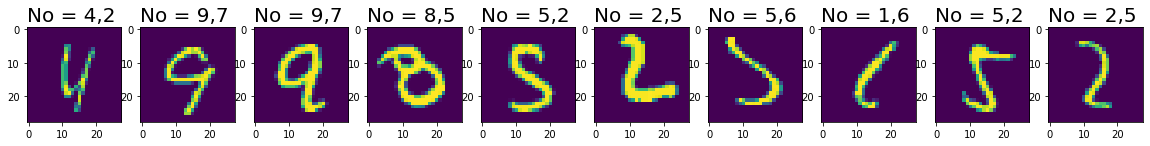

In [16]:
#　不正解データの表示
no=110

fig, ax = plt.subplots(1,10,figsize=(20,5))

for i in range(10):
    image_no=incorrect_id.iloc[i+no][0]
    c=incorrect_id.iloc[i+no][1]
    p=incorrect_id.iloc[i+no][2]
    
    ax[i].imshow(Xtest[image_no] )
    ax[i].set_title('No = {},{} '. format(c,p),fontsize=20)